In [1]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 161 (delta 20), reused 18 (delta 18), pack-reused 139
Receiving objects: 100% (161/161), 302.85 KiB | 17.81 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/ACGPN


In [2]:
!pip install ninja
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 3.7 MB/s eta 0:00:00


In [3]:

import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys
import shutil

from predict_pose import generate_pose_keypoints

In [4]:

!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd pose
!pwd

/content/ACGPN/pose
/content/ACGPN/pose


In [7]:
# Define file paths
source_file_path = '/content/drive/MyDrive/VITON/data/pose_iter_440000.caffemodel'
destination_folder_path = '/content/ACGPN/pose'

# Copy the file
shutil.copy(source_file_path, destination_folder_path)

'/content/ACGPN/pose/pose_iter_440000.caffemodel'

In [8]:
%cd ..

/content/ACGPN


In [9]:
!pwd

/content/ACGPN


In [10]:

!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 769 (delta 103), reused 94 (delta 94), pack-reused 566
Receiving objects: 100% (769/769), 3.89 MiB | 22.90 MiB/s, done.
Resolving deltas: 100% (184/184), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Counting objects: 100% (334/334), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 822 (delta 312), reused 299 (delta 299), pack-reused 488
Receiving objects: 100% (822/822), 30.71 MiB | 15.10 MiB/s, done.
Resolving deltas: 100% (391/391), done.


In [11]:
!pwd

/content/ACGPN


In [12]:
# Define file paths
source_file_path = '/content/drive/MyDrive/VITON/data/exp-schp-201908261155-lip.pth'
destination_folder_path = 'lip_final.pth'

# Copy the file
shutil.copy(source_file_path, destination_folder_path)

'lip_final.pth'

In [13]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp



/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists


In [14]:
pwd

'/content/ACGPN/U-2-Net'

In [16]:
# Define file paths
source_file_path = '/content/drive/MyDrive/VITON/data/u2net.pth'
destination_folder_path = 'saved_models/u2net'

# Copy the file
shutil.copy(source_file_path, destination_folder_path)

'saved_models/u2net/u2net.pth'

In [18]:
# Define file paths
source_file_path = '/content/drive/MyDrive/VITON/data/u2netp.pth'
destination_folder_path = 'saved_models/u2netp'

# Copy the file
shutil.copy(source_file_path, destination_folder_path)

'saved_models/u2netp/u2netp.pth'

In [19]:
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

...load U2NEP---4.7 MB
/content/ACGPN


In [20]:

!mkdir checkpoints

%cd checkpoints
!mkdir label2city

/content/ACGPN/checkpoints


In [21]:

# Define file paths
source_file_path = '/content/drive/MyDrive/VITON/data/ACGPN_checkpoints.zip'

destination_folder_path = '/content/ACGPN/checkpoints'

# Copy the file
shutil.copy(source_file_path, destination_folder_path)




'/content/ACGPN/checkpoints/ACGPN_checkpoints.zip'

In [22]:
%cd /content/ACGPN/checkpoints
!unzip ACGPN_checkpoints
%cd ..

/content/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/content/ACGPN


# **Uploading the cloth **

In [23]:
!pwd
!mkdir inputs/cloth
!mkdir inputs/img
!cd

/content/ACGPN
mkdir: cannot create directory ‘inputs/cloth’: File exists
mkdir: cannot create directory ‘inputs/img’: File exists


In [139]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/cloth


Saving 000001_1.jpg to 000001_1.jpg
/content/ACGPN/inputs
/content/ACGPN


In [140]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/img


Saving 000001_0.jpg to 000001_0.jpg
/content/ACGPN/inputs
/content/ACGPN


In [141]:
import os
name = sorted(os.listdir('inputs/cloth'))[1]
name

'000001_1.jpg'

In [142]:


cloth_name = name
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[1])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Generating mask for: 000001_1.jpg
Saving output at Data_preprocessing/test_edge/000001_1.png


In [143]:
model_name = os.listdir('inputs/img')[0]
model_name

'000001_0.jpg'

In [144]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[1])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)


print(img)

<PIL.Image.Image image mode=RGB size=192x256 at 0x785E116870A0>


In [145]:
img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))


Resized image in 2.266868829727173s


In [146]:
!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))


100% 1/1 [00:00<00:00,  2.60it/s]
Parsing generated in 9.360613822937012s


In [131]:
pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 7.535320281982422s


In [147]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [149]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

In [135]:
from PIL import Image

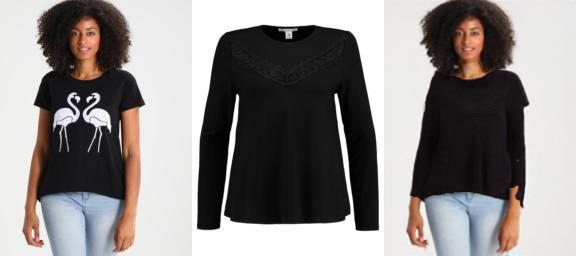

In [150]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid